### Task-1 : IRIS FLOWER CLASSIFICATION
#### LGMVIP October 22
#### Prashant Kumbhar


In [1]:
# Import Packages
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

#### DATASET INFORMATION
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

#### Reading Dataset

In [2]:
iris=load_iris() #loading the data sets
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] # As per the iris dataset information

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Seperate features and target  
x=iris.data
y=iris.target

In [6]:
# Calculate avarage of each features for all classes
y_Data = np.array([np.average(x[:, i][y==j].astype('float32')) for i in range (x.shape[1]) for j in (np.unique(y))])
y_Data_reshaped = y_Data.reshape(4, 3)
y_Data_reshaped = np.swapaxes(y_Data_reshaped, 0, 1)
x_axis = np.arange(len(columns)-1)
width = 0.25

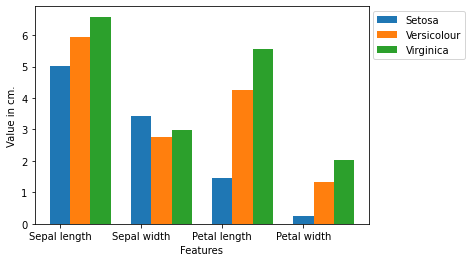

In [7]:
# Plot the avarage
plt.bar(x_axis, y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(x_axis+width, y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(x_axis+width*2, y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(x_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [8]:
y.shape

(150,)

In [9]:
df1=pd.DataFrame(x,columns=iris.feature_names)


In [10]:
# Some basic statistical analysis about the data
df1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df1.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [13]:
df2=pd.DataFrame(y,columns=['Output'])
df2

,Output
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
A=df2['Output'].unique()
A

array([0, 1, 2])

In [15]:
B=df2['Output'].value_counts()
B

0    50
1    50
2    50
Name: Output, dtype: int64

([<matplotlib.axis.XTick at 0x1d634f50f10>,
 [Text(0, 0, 'Setosa'), Text(1, 0, 'Versicolor'), Text(2, 0, 'Virginica')])

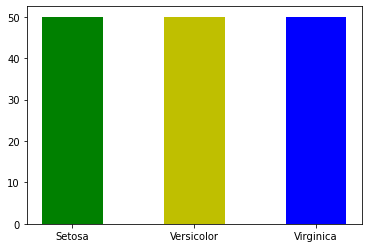

In [16]:
import matplotlib.pyplot as plt
plt.bar(A,B,color=['g','y','b'],width=0.5)
plt.xticks([0,1,2],['Setosa','Versicolor','Virginica'])

<AxesSubplot:>

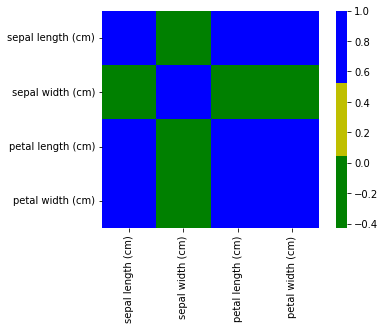

In [17]:
import seaborn as sns
cor=df1.corr()
sns.heatmap(cor,cmap=['g','y','b'],square=True)

In [18]:
df=pd.concat([df1,df2],axis=1) # row wise concatination of two data frames
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


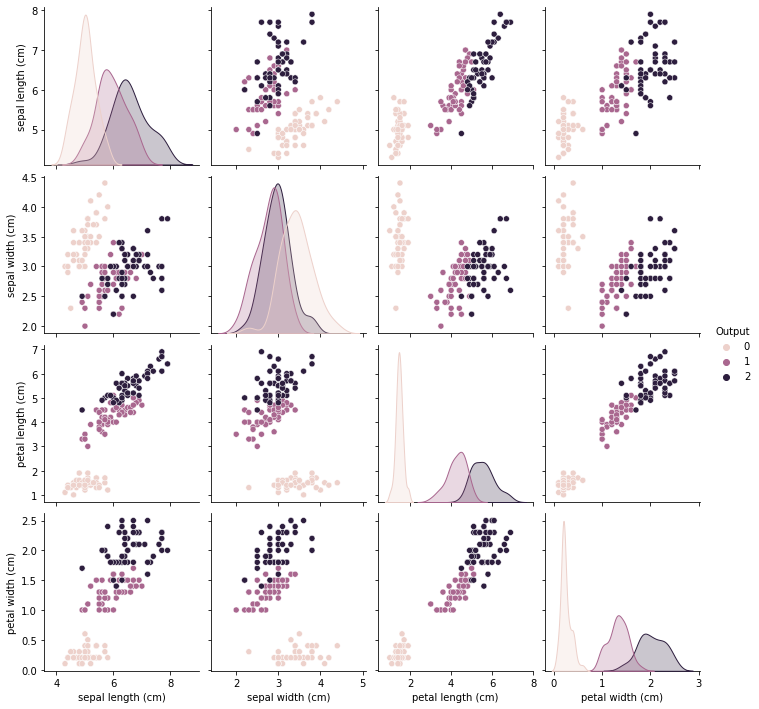

In [19]:
# Visualize the whole dataset
sns.pairplot(df, hue='Output')

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [21]:
X_train.shape

(105, 4)

In [22]:
y_train.shape

(105,)

In [23]:
X_test.shape

(45, 4)

In [24]:
y_test.shape

(45,)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
xtrain_scaled=scaler.fit_transform(X_train)
xtrain_scaled

array([[0.35294118, 0.59090909, 0.05084746, 0.04166667],
       [0.17647059, 0.63636364, 0.06779661, 0.        ],
       [0.        , 0.36363636, 0.01694915, 0.        ],
       [0.55882353, 0.        , 0.59322034, 0.58333333],
       [0.14705882, 0.54545455, 0.10169492, 0.04166667],
       [0.76470588, 0.40909091, 0.66101695, 0.58333333],
       [0.20588235, 0.5       , 0.06779661, 0.04166667],
       [0.70588235, 0.40909091, 0.57627119, 0.54166667],
       [1.        , 0.18181818, 1.        , 0.91666667],
       [0.41176471, 0.27272727, 0.59322034, 0.5       ],
       [0.44117647, 0.22727273, 0.52542373, 0.375     ],
       [0.08823529, 0.40909091, 0.08474576, 0.04166667],
       [0.23529412, 0.59090909, 0.06779661, 0.08333333],
       [1.        , 0.36363636, 0.86440678, 0.91666667],
       [0.11764706, 0.45454545, 0.10169492, 0.04166667],
       [0.32352941, 0.68181818, 0.08474576, 0.04166667],
       [0.08823529, 0.63636364, 0.        , 0.04166667],
       [0.11764706, 0.45454545,

In [27]:
xtest_scaled=scaler.fit_transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(xtrain_scaled,y_train) # Training the KNN classifier
y_pred=knn_classifier.predict(xtest_scaled) #Predicting output by the KNN classifier
print("Predicted class of Flower is:",iris.target_names[y_pred[29]])

Predicted class of Flower is: virginica


In [29]:
import numpy as np
error_rate = []
error_rate2 = []
# Might take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i2 = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_test))
    error_rate2.append(np.mean(pred_i2 != y_train))

Text(0, 0.5, 'Error Rate')

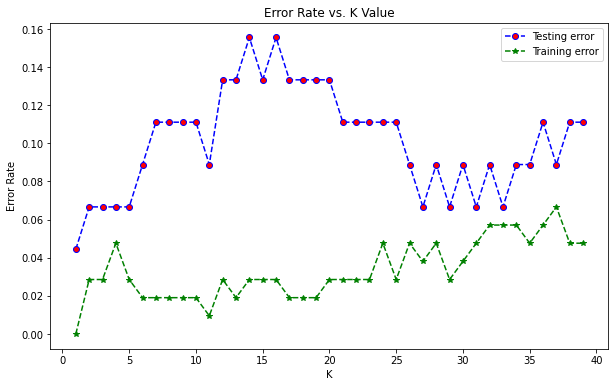

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', label="Testing error",linestyle='dashed', marker='o',markerfacecolor='r')
plt.plot(range(1,40),error_rate2,color='green',label="Training error", linestyle='dashed', marker='*',markerfacecolor='g')
plt.legend()
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
# Finding accuracy by comparing actual output values(y_test)with predicted
#output value(y_pred)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Training Accuracy:", accuracy_score(y_train,knn.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test,y_pred))

Training Accuracy: 0.9523809523809523
Testing Accuracy: 0.9777777777777777


In [32]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 15]], dtype=int64)

In [33]:
# Providing sample data and the model will make prediction out of that data
sample = [[5, 3, 3, 2],[5.4, 3.9, 1.7, 0.4]]
preds = knn_classifier.predict(sample)

In [34]:
preds

array([2, 2])

In [35]:
print("Predicted class of the first flower is:",iris.target_names[preds[0]])

Predicted class of the first flower is: virginica


In [36]:
iris.target_names[y_pred[:5]]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype='<U10')

In [37]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Conclusion
###### Thus we implemented a dataset with 150 rows having 3 specific uniformly distributed species
    Iris Setosa
    Iris Versicolor
    Iris Verginica
Classification Models we used:
    KNeighbourClassifier